### Mounting your GDrive

Mount your google drive so that you'll be able to access the files on your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Importing necessary module for loading own dataset

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.utils.data import random_split
from torch.utils.data import DataLoader

We will use MNIST images downloaded from [here](http://yann.lecun.com/exdb/mnist/). We load only a small sample of the MNIST images just to show you guys how you can load your own custom images for training your model.

Images should be stored in the following format:

Folder

    -- Train (folder)
        -- 0 (folder class label)
          1.jpg
          2.jpg
          3.jpg
        -- 1 (folder class label)
          1.jpg
          2.jpg

        -- 2 (folder class label)
          1.jpg
          2.jpg

There are other ways to load custom datasets in other formats, but we recommend sorting the dataset in the following format for ease of loading. Please refer [here](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) for more information.

We will use the `.ImageFolder` function here.

In [ ]:
data_path = '/content/drive/My Drive/Colab Notebooks/ML201+/MNIST Dataset/trainingSample/' # Set this to your datapath
train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms.ToTensor()
    )

# Print out shape of tensor and labels
tensor_image, label = train_dataset[0]
print(tensor_image.shape, label)

torch.Size([3, 28, 28]) 0


### Visualise Tensors

[`.permute`](https://stackoverflow.com/questions/53623472/how-do-i-display-a-single-image-in-pytorch/53633017) changes the channel to the last dimension, allowing the image to display when using `plt.imshow`.

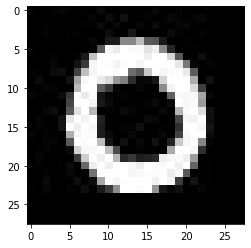

In [ ]:
# Use .permute() to put channels as the last dimension, used for RGB tensor with 3 channels.
plt.imshow(tensor_image.permute(1, 2, 0))

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(train_dataset, [500, 100])
print(len(train_ds), len(val_ds))

500 100


Load images into `train_loader` and `val_loader` respectively.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

print(train_loader)

### Combining all into a single function

In [ ]:
def load_dataset(data_path, batch_size):
    dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transforms.ToTensor()
    )

    train_ds, val_ds = random_split(dataset, [500,100]) # Manually define split

    train_loader = DataLoader(
        train_ds,
        batch_size=64,  
        shuffle=True)
    
    val_loader = DataLoader(
        val_ds,
        batch_size=64)

    return train_loader, val_loader

In [ ]:
load_dataset('/content/drive/My Drive/Colab Notebooks/ML201+/MNIST Dataset/trainingSample/',64)

<torch.utils.data.dataloader.DataLoader object at 0x7f2befe2fe80> <torch.utils.data.dataloader.DataLoader object at 0x7f2befe8ce80>


This train_loader and val_loader can then be passed into the `fit` function defined in the other notebook. Now, you can try creating your own dataset and loading them yourselves!!